xmin = [ 2.00029584 -1.00100244]
fmin = 1.0924198541493913e-06
accepted steps = 305


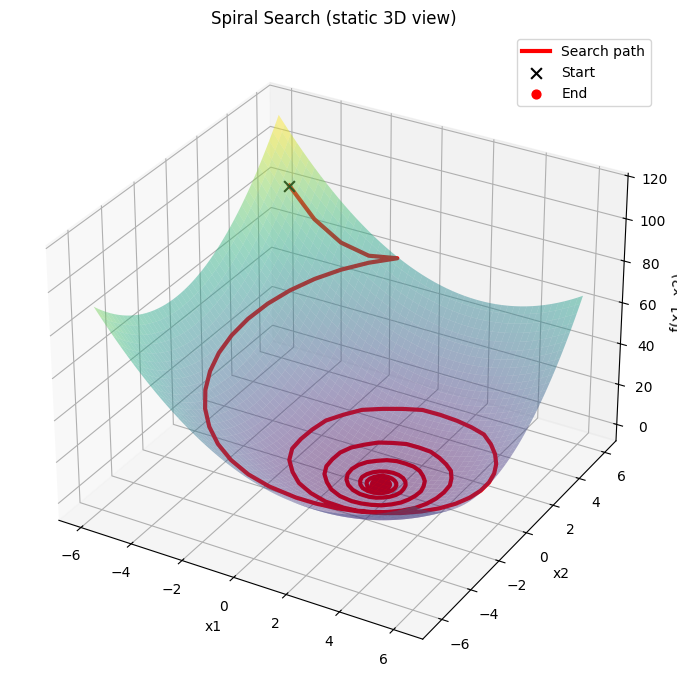

C:\Users\Veljko\PycharmProjects\numerical-optimization-algorithms\.venv\Lib\site-packages\matplotlib\animation.py:908: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


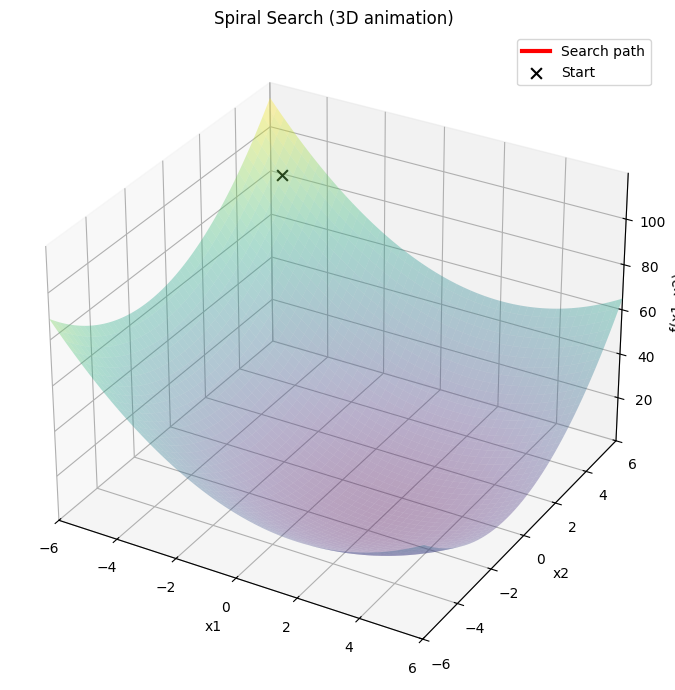

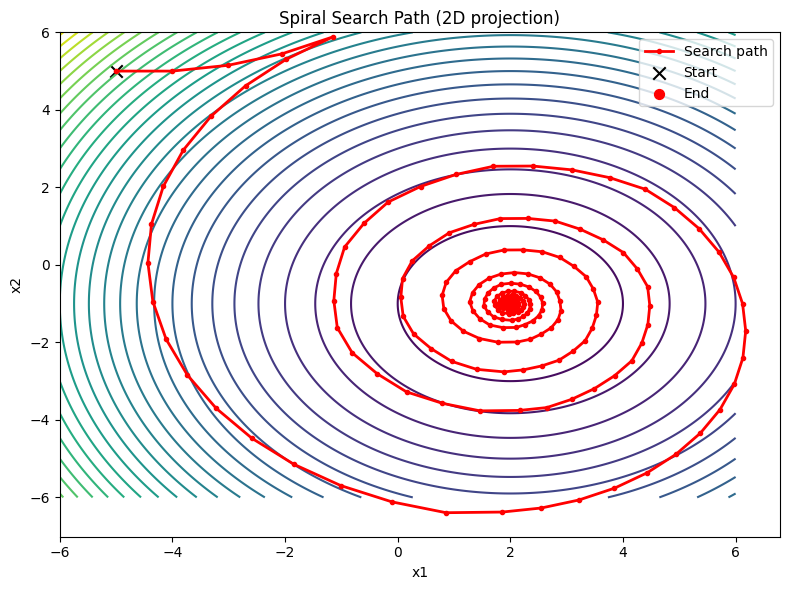

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 (needed for 3D)

from test_functions import f_test1  # or your other test function


def spiral_search(f, x0, delta=1.0, delta_min=1e-3, dphi=0.15, shrink=0.7):

    x = np.array(x0, dtype=float)
    history = [x.copy()]

    while delta > delta_min:
        phis = np.arange(0.0, 2.0 * np.pi + dphi, dphi)

        improved = False
        for phi in phis:
            candidate = x + delta * np.array([np.cos(phi), np.sin(phi)], dtype=float)

            if f(candidate) < f(x):
                x = candidate
                history.append(x.copy())
                improved = True

        delta *= shrink

    xmin = x.copy()
    fmin = float(f(xmin))
    return xmin, fmin, np.array(history)


f = f_test1

a = (-5, -5)
b = (5, 5)

xmin, fmin, history = spiral_search(
    f,
    x0=[-5, 5],
    delta=1.0,
    delta_min=1e-3,
    dphi=0.15,
    shrink=0.7
)

print("xmin =", xmin)
print("fmin =", fmin)
print("accepted steps =", len(history))

nx = 250
ny = 250
xg = np.linspace(a[0] - 1, b[0] + 1, nx)
yg = np.linspace(a[1] - 1, b[1] + 1, ny)
X, Y = np.meshgrid(xg, yg)

f_vec = np.vectorize(lambda xx, yy: f(np.array([xx, yy], dtype=float)))
Z = f_vec(X, Y).astype(float)

xs = history[:, 0]
ys = history[:, 1]
zs = np.array([f(np.array([xx, yy], dtype=float)) for xx, yy in zip(xs, ys)], dtype=float)

z_offset = 0.02 * (np.nanmax(Z) - np.nanmin(Z))
zs_lifted = zs + z_offset

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection="3d")

ax.plot_surface(
    X, Y, Z,
    cmap="viridis",
    alpha=0.45,
    linewidth=0,
    antialiased=True
)

ax.plot(xs, ys, zs_lifted, color="red", lw=3, label="Search path")
ax.scatter(xs[0], ys[0], zs_lifted[0], color="black", s=60, marker="x", label="Start")
ax.scatter(xs[-1], ys[-1], zs_lifted[-1], color="red", s=40, marker="o", label="End")

ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("f(x1, x2)")
ax.set_title("Spiral Search (static 3D view)")
ax.legend()
plt.tight_layout()
plt.show()

fig2 = plt.figure(figsize=(11, 7))
ax2 = fig2.add_subplot(111, projection="3d")

ax2.plot_surface(
    X, Y, Z,
    cmap="viridis",
    alpha=0.35,
    linewidth=0
)

line, = ax2.plot([], [], [], color="red", lw=3, label="Search path")
point, = ax2.plot([], [], [], "ro", markersize=6)

ax2.scatter(xs[0], ys[0], zs_lifted[0], color="black", s=60, marker="x", label="Start")

ax2.set_xlabel("x1")
ax2.set_ylabel("x2")
ax2.set_zlabel("f(x1, x2)")
ax2.set_title("Spiral Search (3D animation)")
ax2.legend()

ax2.set_xlim(xg.min(), xg.max())
ax2.set_ylim(yg.min(), yg.max())
ax2.set_zlim(np.nanmin(Z), np.nanmax(Z) + 3 * z_offset)

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    point.set_data([], [])
    point.set_3d_properties([])
    return line, point

def update(frame):
    line.set_data(xs[:frame+1], ys[:frame+1])
    line.set_3d_properties(zs_lifted[:frame+1])

    point.set_data([xs[frame]], [ys[frame]])
    point.set_3d_properties([zs_lifted[frame]])
    return line, point

anim = FuncAnimation(
    fig2,
    update,
    frames=len(xs),
    init_func=init,
    interval=200,
    blit=False,
    repeat=False
)

plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 6))
plt.contour(X, Y, Z, levels=35)
plt.plot(xs, ys, "r-o", markersize=3, linewidth=2, label="Search path")
plt.scatter(xs[0], ys[0], color="black", marker="x", s=80, label="Start")
plt.scatter(xs[-1], ys[-1], color="red", marker="o", s=50, label="End")
plt.xlabel("x1")
plt.ylabel("x2")
plt.title("Spiral Search Path (2D projection)")
plt.legend()
plt.tight_layout()
plt.show()
